In [8]:
! pip install --upgrade matplotlib


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# Question

What factors are the best predictors for job salary given a certain college major?

# Data Collection

Dataset downloaded from https://www.kaggle.com/datasets/williecosta/economic-guide-to-college-majors?resource=download

# Data Cleaning

In [10]:
major_df = pd.read_csv(r'C:\Users\micha\OneDrive\Documents\School Documents\Fall 2022\STAT 4185\Stat-4185-final-project\CollegeMajors.csv')

In [11]:
major_df.dtypes

Rank                      int64
Major_code                int64
Major                    object
Total                     int64
Men                       int64
Women                     int64
Major_category           object
ShareWomen              float64
Sample_size               int64
Employed                  int64
Full_time                 int64
Part_time                 int64
Full_time_year_round      int64
Unemployed                int64
Unemployment_rate       float64
Median                    int64
P25th                     int64
P75th                     int64
College_jobs              int64
Non_college_jobs          int64
Low_wage_jobs             int64
dtype: object

In [12]:
major_df = major_df.rename(columns = {'Major_category': 'Category', 'ShareWomen': 'Rate of Women', 'Unemployment_rate' : 'Unemployment Rate', 'Median': 'Median Salary'})

Renaming the column titles for columns that I will be using in the project, so that the column is neater, and labeled more appropriately.

In [13]:
major_df['Full Time Employment'] = major_df.Full_time/major_df.Total

This line was used to create a new column using the existing data. I created full time employment column that lists the rate of people with that major that have full time employment. This is a good metric to use because it focuses only on people who have been able to find a full time job, as opposed to the unemployment rate, which factors out people with just part time work.

In [14]:
major_ranking = major_df[['Rank', 'Major', 'Category', 'Rate of Women', 'Unemployment Rate', 'Median Salary', 'P75th', 'Full Time Employment']]
major_ranking

,Rank,Major,Category,Rate of Women,Unemployment Rate,Median Salary,P75th,Full Time Employment
0,1,PETROLEUM ENGINEERING,Engineering,0.1206,0.0184,110000,125000,0.790509
1,2,MINING AND MINERAL ENGINEERING,Engineering,0.1019,0.1172,75000,90000,0.735450
2,3,METALLURGICAL ENGINEERING,Engineering,0.1530,0.0241,73000,105000,0.651869
3,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,0.1073,0.0501,70000,80000,0.849762
4,5,CHEMICAL ENGINEERING,Engineering,0.3416,0.0611,65000,75000,0.718227
...,...,...,...,...,...,...,...,...
168,169,ZOOLOGY,Biology & Life Science,0.6373,0.0463,26000,39000,0.599715
169,170,EDUCATIONAL PSYCHOLOGY,Psychology & Social Work,0.8171,0.0651,25000,34000,0.647512
170,171,CLINICAL PSYCHOLOGY,Psychology & Social Work,0.7999,0.1490,25000,40000,0.607470
171,172,COUNSELING PSYCHOLOGY,Psychology & Social Work,0.7987,0.0536,23400,26000,0.681799


I chose these columns to bring forward into the next part of the project because they all are metrics that I believe could have some correlation with the median salary for the major. These columns will be in the final dataset so they can be looked at further, while the columns I don't intend to use have been filtered out.

In [15]:
major_ranking.to_csv("Majors_cleaned.csv")

# Data Visulization

In [16]:
major_ranking = pd.read_csv('Majors_cleaned.csv')

In [17]:
major_ranking.describe()

,Unnamed: 0,Rank,Rate of Women,Unemployment Rate,Median Salary,P75th,Full Time Employment
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,86.000000,87.000000,0.522237,0.068190,40151.445087,51494.219653,0.671898
std,50.084928,50.084928,0.230530,0.030329,11470.181802,14906.279740,0.124652
min,0.000000,1.000000,0.000000,0.000000,22000.000000,22000.000000,0.372872
25%,43.000000,44.000000,0.339700,0.050300,33000.000000,42000.000000,0.597403
50%,86.000000,87.000000,0.532300,0.068000,36000.000000,47000.000000,0.674303
75%,129.000000,130.000000,0.702000,0.087600,45000.000000,60000.000000,0.735450
max,172.000000,173.000000,0.969000,0.177200,110000.000000,125000.000000,1.612863


In [18]:
major_ranking.drop(['Unnamed: 0'], axis = 1, inplace=True)

C:\Users\micha\AppData\Local\Temp\ipykernel_8144\602630622.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(major_ranking.corr())


<AxesSubplot: >

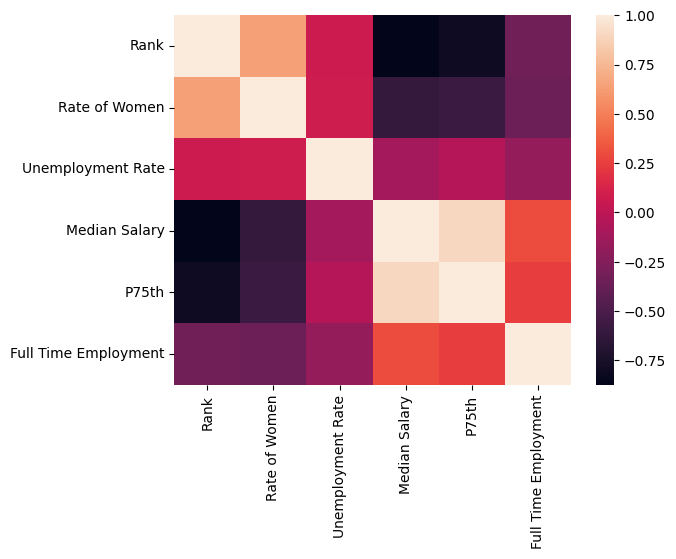

In [19]:
sns.heatmap(major_ranking.corr())

From this heatmap we can start to get a good idea of which factors correlate most with the salary. Rank is based directly off of median salary so naturally those have a very strong correlation, but there are other factors that have correlations as well. The rate of women in the major actually has a decent correlation with both rank and median salary. This tells us that very generally, majors that have a higher concentration of women tend to earn less money. Surprisingly, the unemployment rate of people within the major does not have much of any correlation at all. I would have expected majors that had more trouble finding jobs to generally earn less money, but this does not seem to be the case.

In [20]:
major_ranking.head()

,Rank,Major,Category,Rate of Women,Unemployment Rate,Median Salary,P75th,Full Time Employment
0,1,PETROLEUM ENGINEERING,Engineering,0.1206,0.0184,110000,125000,0.790509
1,2,MINING AND MINERAL ENGINEERING,Engineering,0.1019,0.1172,75000,90000,0.735450
2,3,METALLURGICAL ENGINEERING,Engineering,0.1530,0.0241,73000,105000,0.651869
3,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,0.1073,0.0501,70000,80000,0.849762
4,5,CHEMICAL ENGINEERING,Engineering,0.3416,0.0611,65000,75000,0.718227


Text(0, 0.5, 'Median Salary')

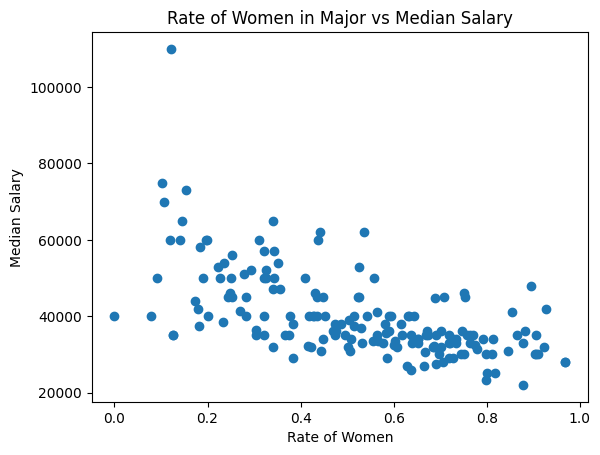

In [21]:
plt.scatter(major_ranking['Rate of Women'], major_ranking['Median Salary'])
plt.title('Rate of Women in Major vs Median Salary')
plt.xlabel('Rate of Women')
plt.ylabel('Median Salary')

This graph is used to look at the correlation described above in the heatmap section between the rate of women in the major and the median salary. There clearly is somewhat of a correlation as many of the higher paying majors tend to have less women. However, this correlation is not extremely strong as there are many female dominated fields that have similar median salaries as majors in male dominated fields.

Text(0, 0.5, 'Median Salary')

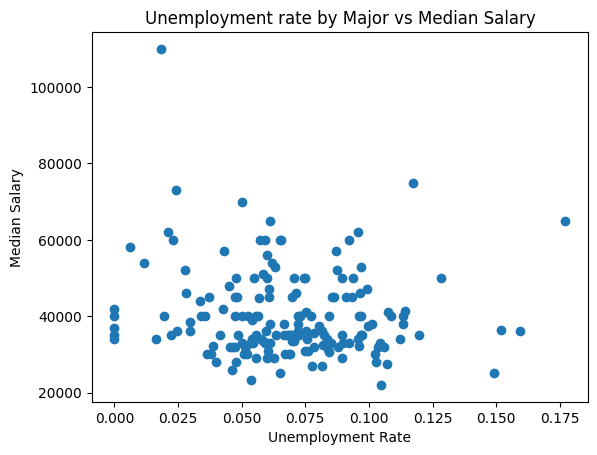

In [22]:
plt.scatter(major_ranking['Unemployment Rate'], major_ranking['Median Salary'])
plt.title("Unemployment rate by Major vs Median Salary")
plt.xlabel("Unemployment Rate")
plt.ylabel("Median Salary")

This graph shows us the relationship between the unemployment rate and the median salary. As we saw above on the heatmap, there really is not much of a correlation here, and the data seems to be mostly just randomly scattered about. Something that we can takeaway from this relationship is that job security and salary are two very separate issues with not much of a correlation.

# Data Modelling

In [23]:
df_preprocess = major_df.copy()

In [24]:
pd.set_option('display.max_columns', None)

In [25]:
df_preprocess.head()

,Rank,Major_code,Major,Total,Men,Women,Category,Rate of Women,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment Rate,Median Salary,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Full Time Employment
0,1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.1206,36,1976,1849,270,1207,37,0.0184,110000,95000,125000,1534,364,193,0.790509
1,2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.1019,7,640,556,170,388,85,0.1172,75000,55000,90000,350,257,50,0.735450
2,3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0.1530,3,648,558,133,340,16,0.0241,73000,50000,105000,456,176,0,0.651869
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.1073,16,758,1069,150,692,40,0.0501,70000,43000,80000,529,102,0,0.849762
4,5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0.3416,289,25694,23170,5180,16697,1672,0.0611,65000,50000,75000,18314,4440,972,0.718227


In [26]:
df_preprocess_sub = df_preprocess.iloc[:, [3,7,8,11,14,15,16,17,19,20,21]]

In [27]:
df_preprocess_sub.head()

,Total,Rate of Women,Sample_size,Part_time,Unemployment Rate,Median Salary,P25th,P75th,Non_college_jobs,Low_wage_jobs,Full Time Employment
0,2339,0.1206,36,270,0.0184,110000,95000,125000,364,193,0.790509
1,756,0.1019,7,170,0.1172,75000,55000,90000,257,50,0.735450
2,856,0.1530,3,133,0.0241,73000,50000,105000,176,0,0.651869
3,1258,0.1073,16,150,0.0501,70000,43000,80000,102,0,0.849762
4,32260,0.3416,289,5180,0.0611,65000,50000,75000,4440,972,0.718227


In [28]:
X = df_preprocess_sub.iloc[:, [0] + [1] + [2] + [3] + [4] + list(range(6, df_preprocess_sub.shape[1]))]

In [29]:
y = df_preprocess_sub['Median Salary']

In [30]:
X.head()

,Total,Rate of Women,Sample_size,Part_time,Unemployment Rate,P25th,P75th,Non_college_jobs,Low_wage_jobs,Full Time Employment
0,2339,0.1206,36,270,0.0184,95000,125000,364,193,0.790509
1,756,0.1019,7,170,0.1172,55000,90000,257,50,0.735450
2,856,0.1530,3,133,0.0241,50000,105000,176,0,0.651869
3,1258,0.1073,16,150,0.0501,43000,80000,102,0,0.849762
4,32260,0.3416,289,5180,0.0611,50000,75000,4440,972,0.718227


In [31]:
cols = X.columns.tolist()

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_stand = pd.DataFrame(scaler.fit_transform(X[cols]), columns=cols)

In [33]:
X_stand.head()

,Total,Rate of Women,Sample_size,Part_time,Unemployment Rate,P25th,P75th,Non_college_jobs,Low_wage_jobs,Full Time Employment
0,-0.582659,-1.747290,-0.519130,-0.586233,-1.646448,7.166555,4.945510,-0.544691,-0.529397,0.954296
1,-0.607715,-1.828643,-0.566165,-0.593080,1.620644,2.789936,2.590690,-0.549201,-0.550047,0.511312
2,-0.606132,-1.606337,-0.572652,-0.595613,-1.457962,2.242859,3.599899,-0.552616,-0.557267,-0.161145
3,-0.599769,-1.805151,-0.551568,-0.594449,-0.598201,1.476951,1.917885,-0.555736,-0.557267,1.431021
4,-0.109079,-0.785847,-0.108797,-0.250065,-0.234456,2.242859,1.581482,-0.372858,-0.416904,0.372744


In [34]:
X.head()

,Total,Rate of Women,Sample_size,Part_time,Unemployment Rate,P25th,P75th,Non_college_jobs,Low_wage_jobs,Full Time Employment
0,2339,0.1206,36,270,0.0184,95000,125000,364,193,0.790509
1,756,0.1019,7,170,0.1172,55000,90000,257,50,0.735450
2,856,0.1530,3,133,0.0241,50000,105000,176,0,0.651869
3,1258,0.1073,16,150,0.0501,43000,80000,102,0,0.849762
4,32260,0.3416,289,5180,0.0611,50000,75000,4440,972,0.718227


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X.iloc[:, 0:10], y)
y_pred = model.predict(X.iloc[:, 0:10])
print("Mean Squared Error:", mean_squared_error(y, y_pred))

Mean Squared Error: 8530844.83658326


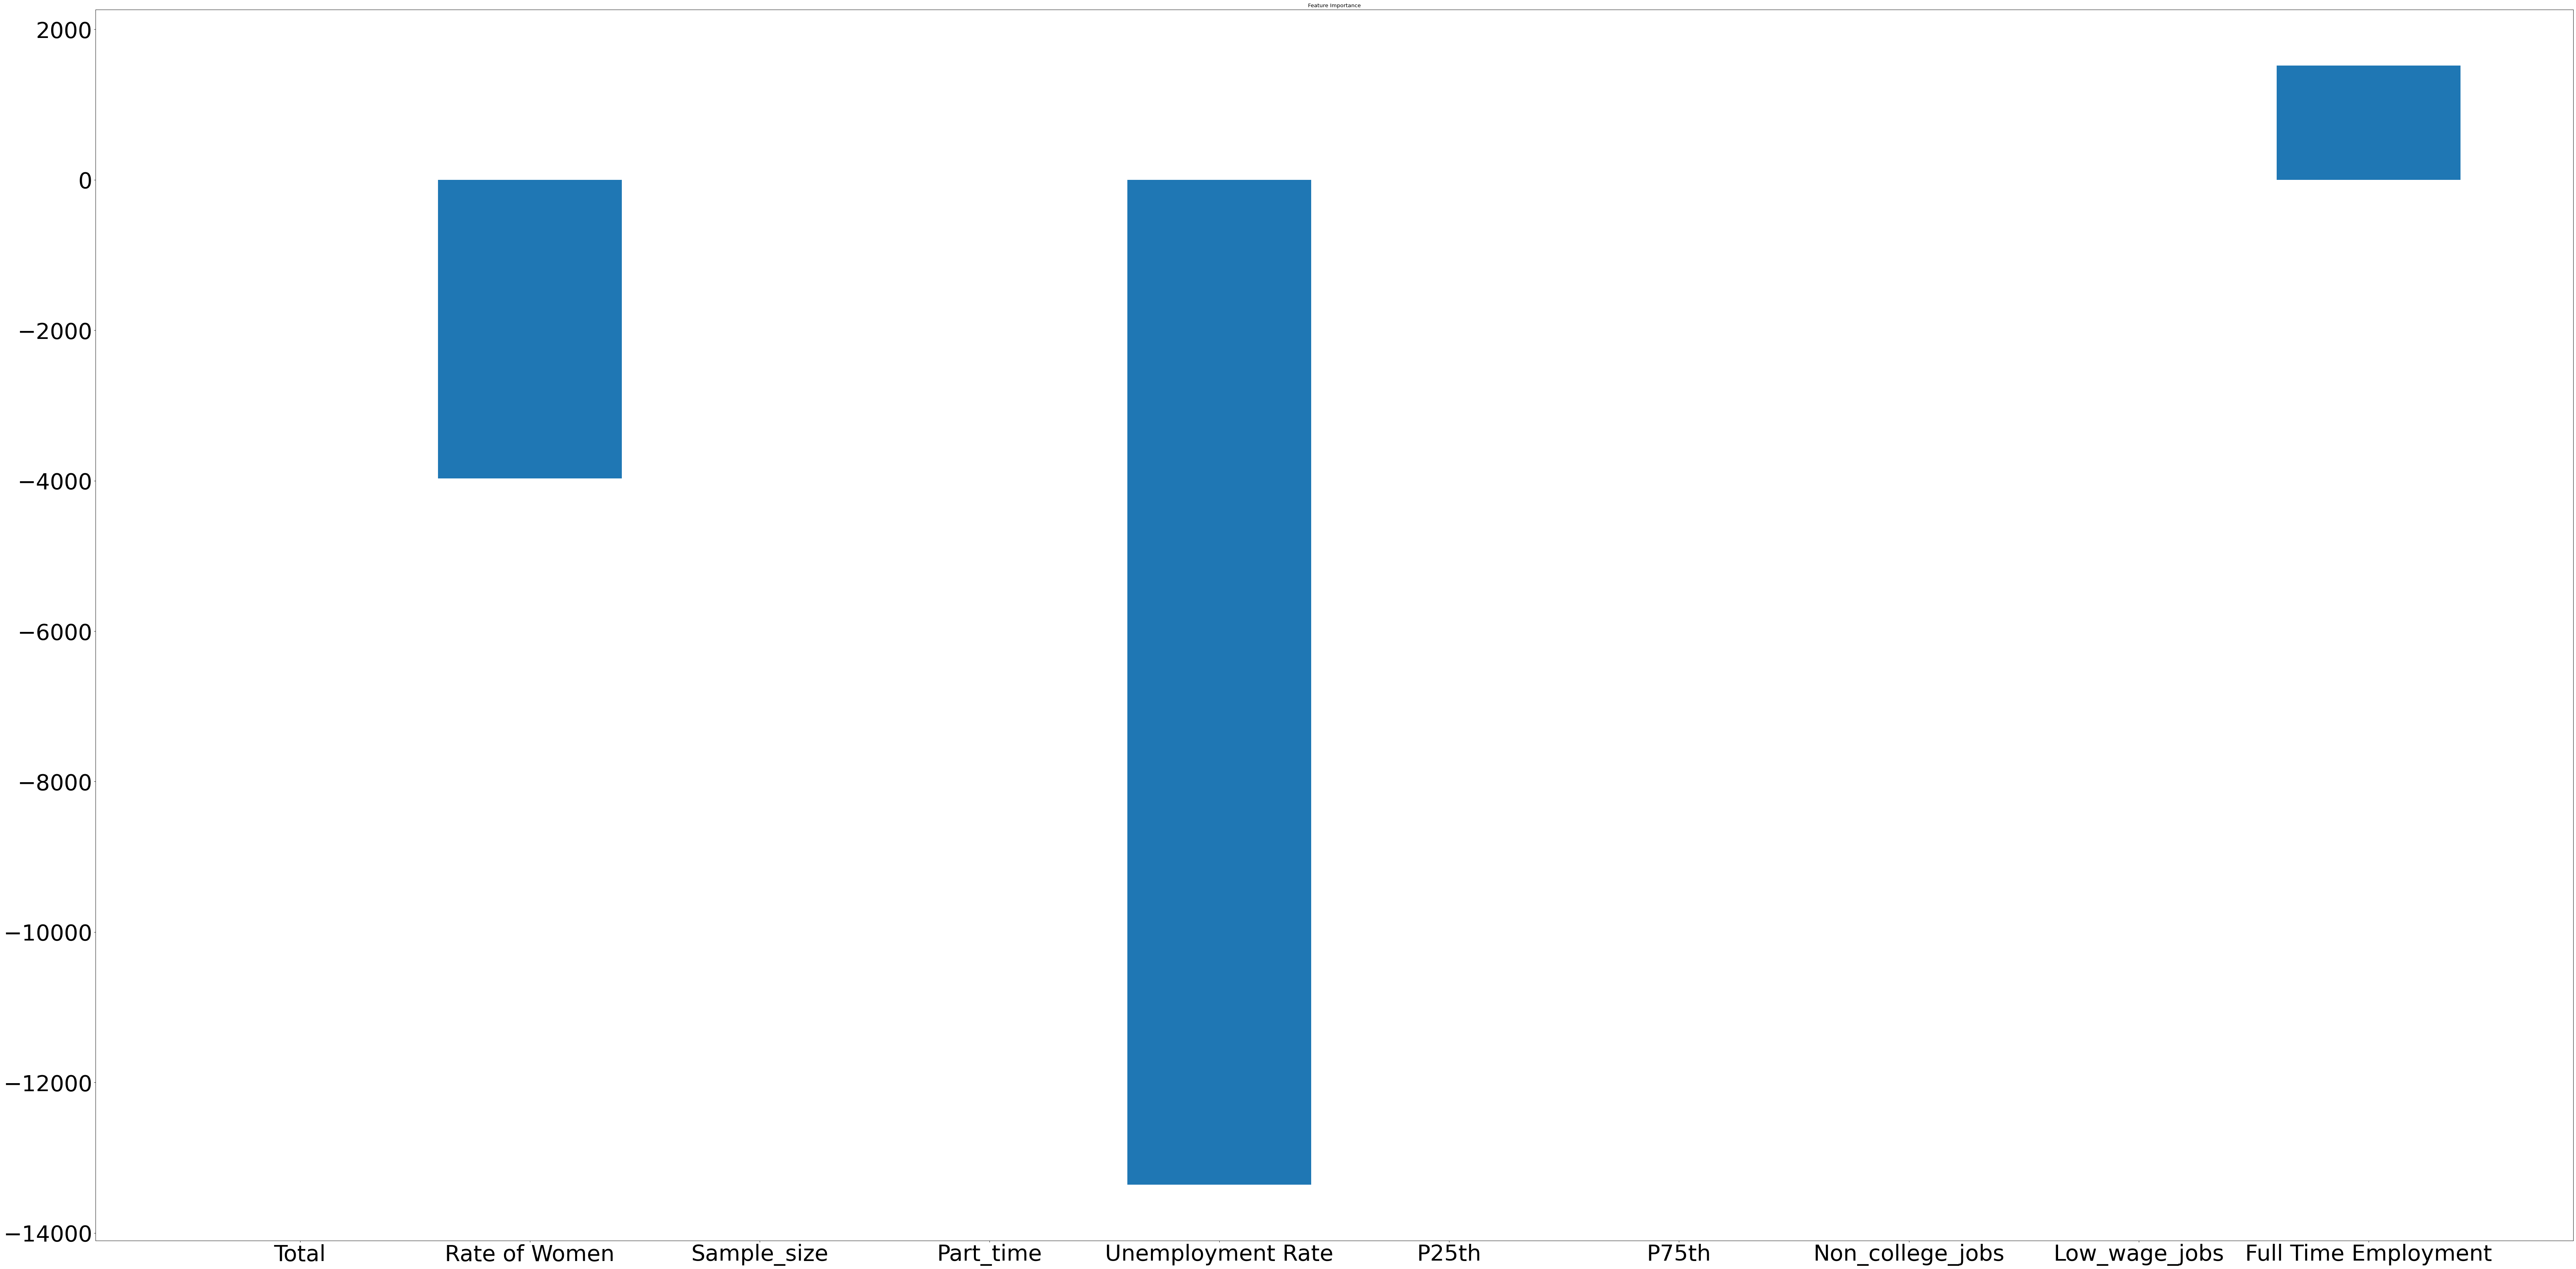

In [41]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(100, 50), dpi=80)
feature_importance = model.coef_
feature_names = X.iloc[:, 0:10].columns

plt.bar(feature_names, feature_importance)
plt.tick_params(axis='both', labelsize=50)
plt.title("Feature Importance")
plt.show()

In [37]:
temp = {"feature":cols, "feature_importance":feature_importance.ravel()}
pd.DataFrame(temp)

,feature,feature_importance
0,Total,0.001121
1,Rate of Women,-3969.366386
2,Sample_size,0.537937
3,Part_time,-0.001257
4,Unemployment Rate,-13360.313078
5,P25th,0.592516
6,P75th,0.384765
7,Non_college_jobs,-0.067753
8,Low_wage_jobs,0.146245
9,Full Time Employment,1517.494711


In [38]:
# from sklearn import svm
# regr = svm.SVR(kernel='linear')
# regr.fit(X.iloc[:, 0:16], y)
# y_pred = regr.predict(X.iloc[:, 0:16])

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X.iloc[:, 0:16], y)
y_pred = regressor.predict(X.iloc[:, 0:16])

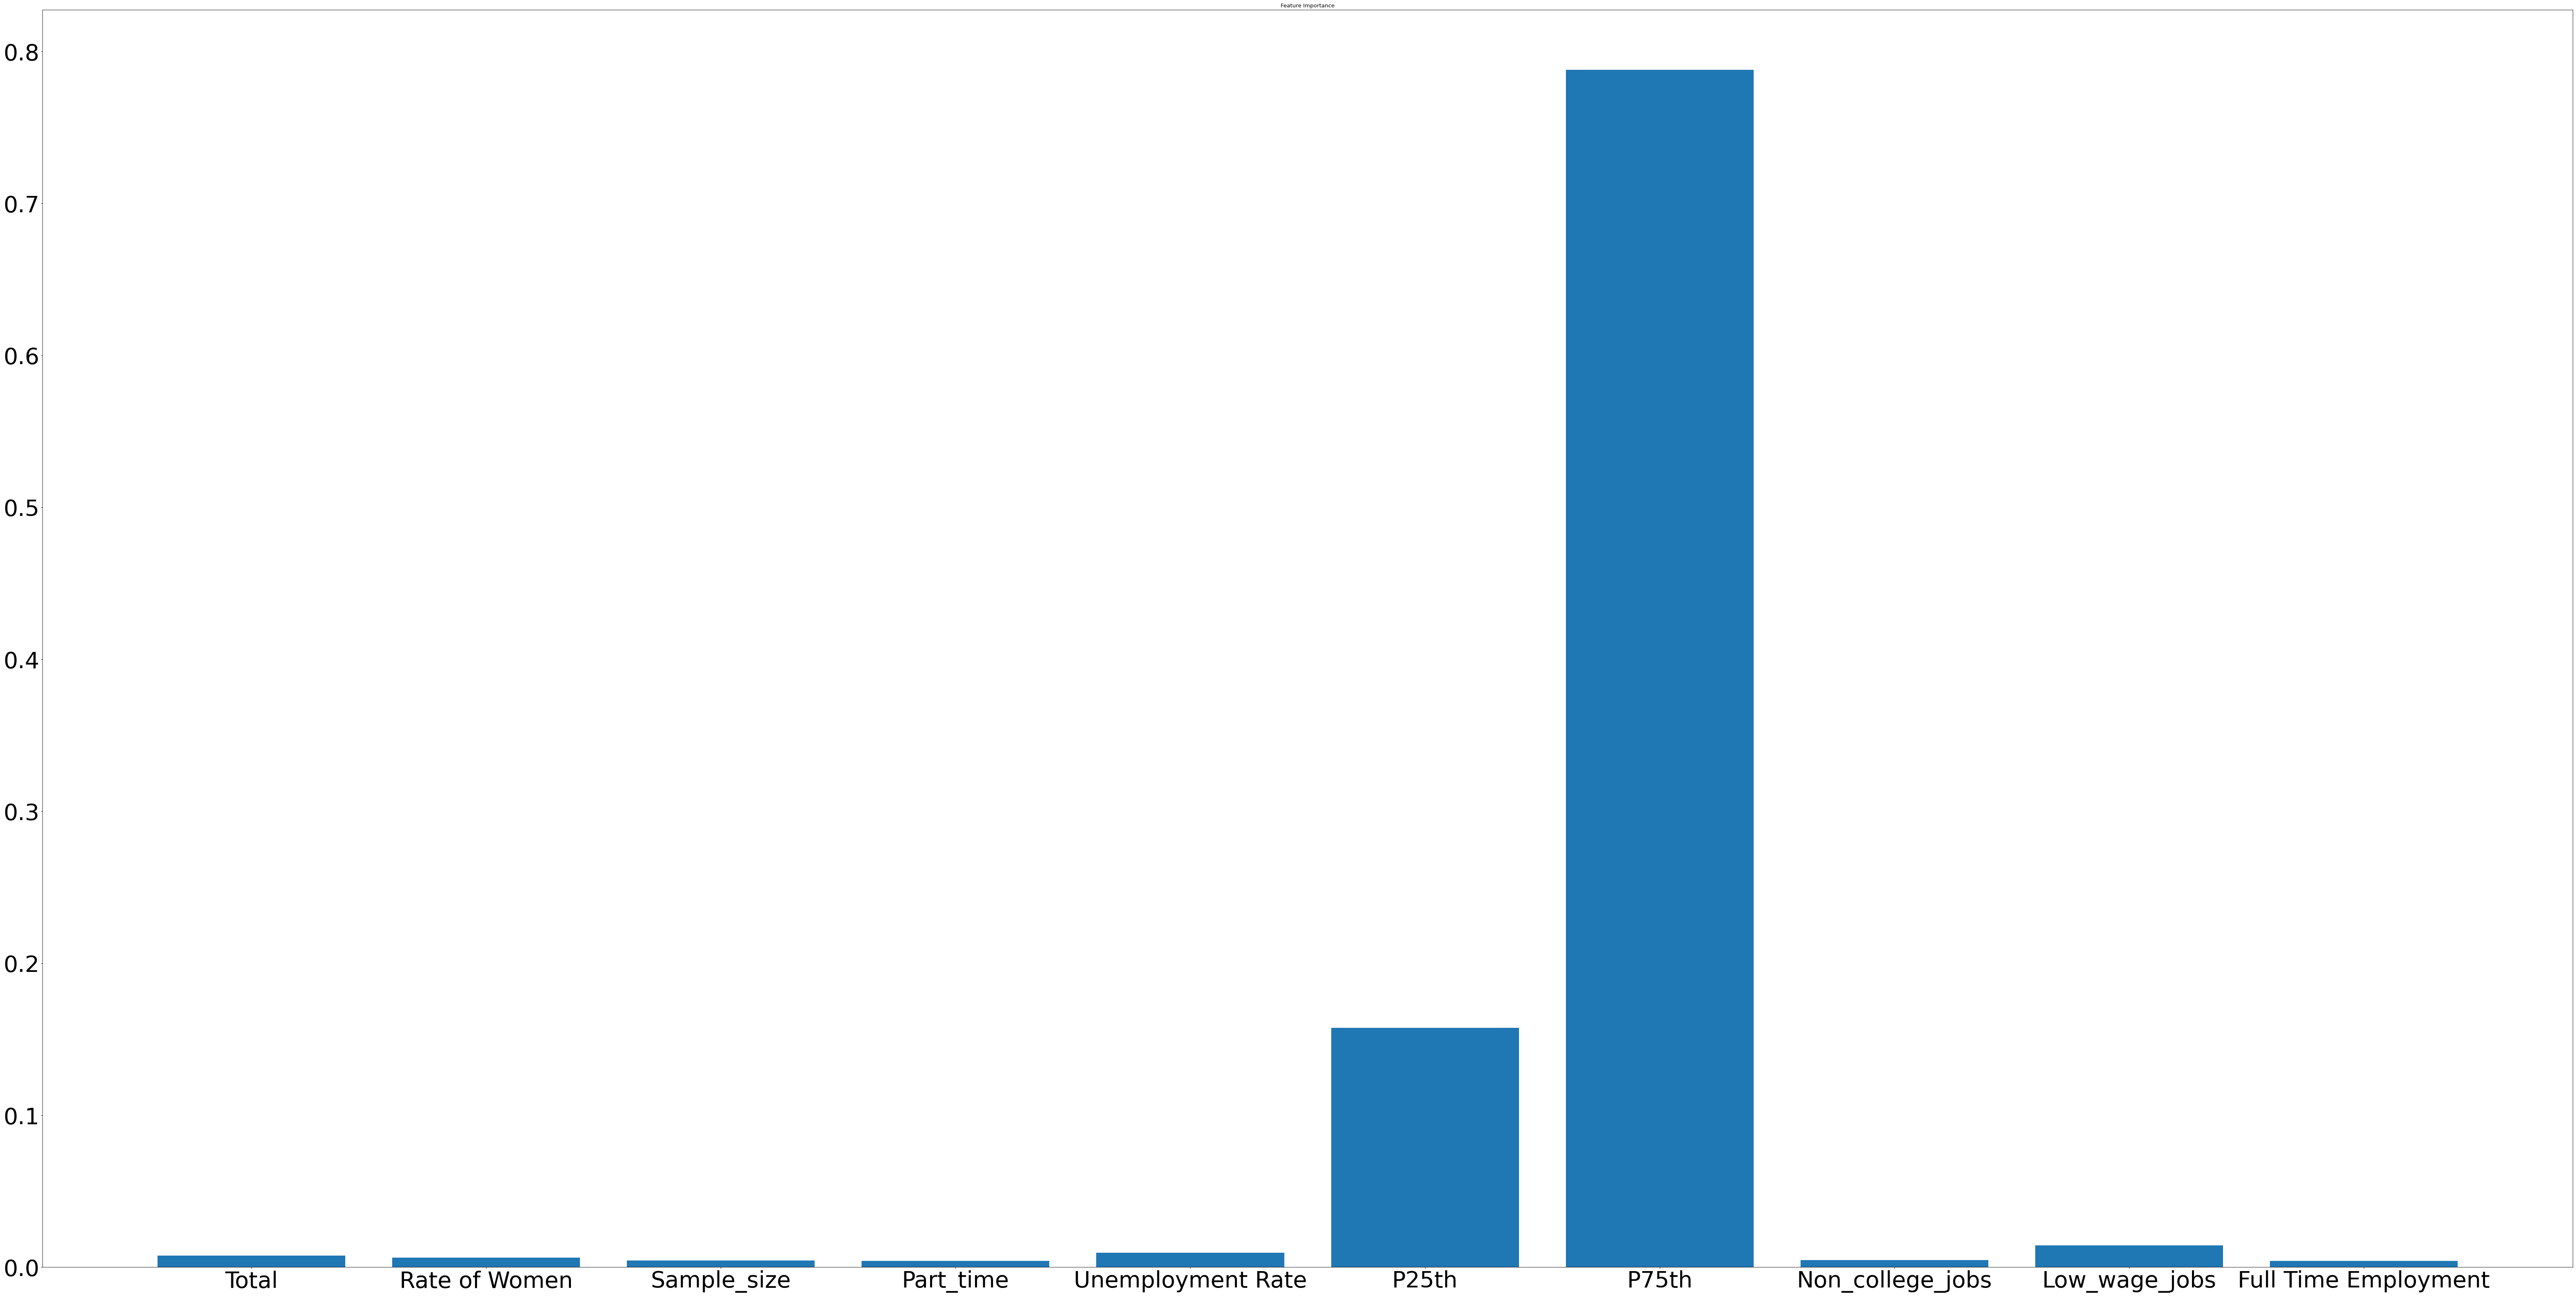

In [39]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(100, 50), dpi=80)
feature_importance_dt = regressor.feature_importances_
feature_names = X.iloc[:, 0:16].columns

plt.bar(feature_names, feature_importance_dt.ravel())
plt.tick_params(axis='both', which='major', labelsize=50)
plt.title("Feature Importance")
plt.show()

In [40]:
temp = {"feature":cols, "feature_importance":feature_importance_dt.ravel()}
pd.DataFrame(temp)

,feature,feature_importance
0,Total,0.007449
1,Rate of Women,0.006185
2,Sample_size,0.004444
3,Part_time,0.004029
4,Unemployment Rate,0.009518
5,P25th,0.157554
6,P75th,0.787942
7,Non_college_jobs,0.004521
8,Low_wage_jobs,0.014292
9,Full Time Employment,0.004066


From this we are able to see that the only factor that is really a good predictor of median salary is salary at the 75th percentile. What I think is very interesting is that the 75th percentile is a much better predictor of the median than the 25th percentile. Looking on the higher end of a majors prospects will give you a better idea of what to expect than the lower end.

Overall, figuring out how much money a major will make is not something that can be easily predicted using non-monetary factors. The percentage of women in the field can generally relate to the salary, but this isn't a very strong relationship and is definitely not a good predictor. Other factors such as unemployment rates, and what type of jobs the major gets do not really support a prediction at all. The job market is a very complext thing, so any one of these factors is not a sufficient predictor towards figuring out an expected salary.